# Santander Customer Transaction Prediction

__Can you identify who will make a transaction?__

https://www.kaggle.com/c/santander-customer-transaction-prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('santander_train.csv')

In [4]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [19]:
data.shape

(200000, 202)

In [20]:
data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

__Getting the main statistics with describe() function:__

In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


__Transposing the data frame for better visibility:__

In [6]:
data.describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
var_4,200000.0,11.078333,1.623150,5.0748,9.883175,11.10825,12.261125,16.6714
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516
var_6,200000.0,5.408949,0.866607,2.3473,4.767700,5.38510,6.003000,8.4477
var_7,200000.0,16.545850,3.418076,5.3497,13.943800,16.45680,19.102900,27.6918
var_8,200000.0,0.284162,3.332634,-10.5055,-2.317800,0.39370,2.937900,10.1513


__Getting high level statistics:__

In [23]:
data.describe().T[1:].describe() #target removed

,count,mean,std,min,25%,50%,75%,max
count,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,200000.0,6.767449,4.494650,-8.493403,3.446011,6.768959,10.075987,21.921336
std,0.0,7.846916,3.459607,15.150283,8.457843,7.790188,8.070038,13.889297
min,200000.0,-16.548147,0.007186,-90.252500,-28.730700,-16.482600,-6.409375,1.571900
25%,200000.0,0.955711,1.698540,-16.349150,-1.617225,0.997262,3.633344,12.687175
50%,200000.0,6.582843,3.944654,-5.473050,5.115100,6.592200,8.747925,18.456150
75%,200000.0,12.359915,6.347132,2.152025,9.427694,12.380737,14.213600,27.767925
max,200000.0,24.521078,21.404912,13.729000,16.047975,24.445000,33.633150,74.032100


__Plotting the general statistics on variables instead of observations:__

In [4]:
var_stat=data.describe().T[1:] #target removed

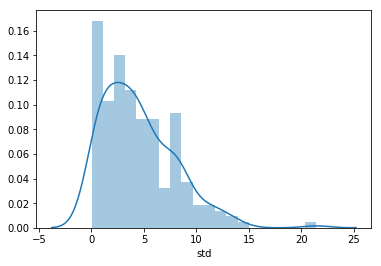

In [26]:
sns.distplot(var_stat['std'],bins=20) #variable std distribution plot

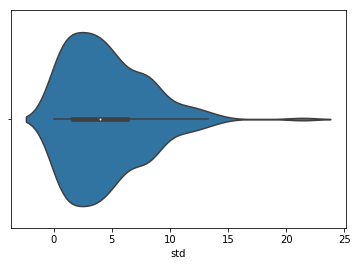

In [27]:
sns.violinplot(var_stat['std'])

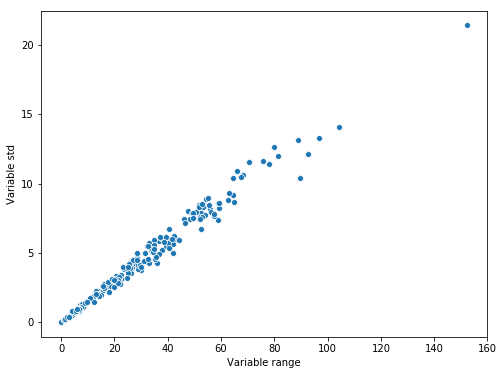

In [8]:
plt.figure(figsize = (8, 6)) 
sns.scatterplot(var_stat['max']-var_stat['min'],var_stat['std'])
plt.xlabel('Variable range')
plt.ylabel('Variable std')
plt.show()

__Clustering of variables according to the main statistics:__


In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=4).fit(var_stat.drop('count',1))
labels = model.predict(var_stat.drop('count',1))

In [10]:
var_stat['labels']=labels

In [12]:
var_stat.head(30)

,count,mean,std,min,25%,50%,75%,max,labels
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150,3
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768,0
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530,3
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883,0
var_4,200000.0,11.078333,1.623150,5.0748,9.883175,11.10825,12.261125,16.6714,3
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516,2
var_6,200000.0,5.408949,0.866607,2.3473,4.767700,5.38510,6.003000,8.4477,0
var_7,200000.0,16.545850,3.418076,5.3497,13.943800,16.45680,19.102900,27.6918,3
var_8,200000.0,0.284162,3.332634,-10.5055,-2.317800,0.39370,2.937900,10.1513,0
var_9,200000.0,7.567236,1.235070,3.9705,6.618800,7.62960,8.584425,11.1506,0


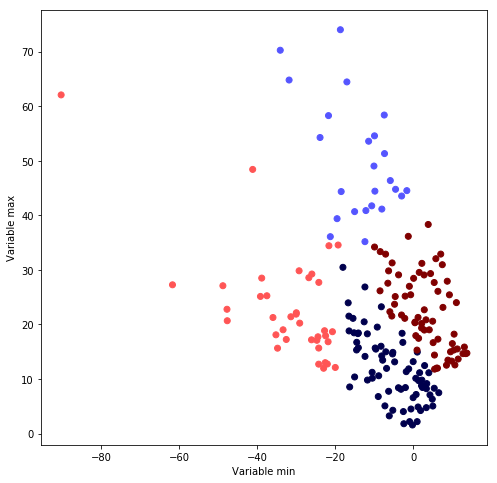

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(var_stat['min'].values, var_stat['max'].values, c=labels,cmap='seismic')
plt.xlabel('Variable min')
plt.ylabel('Variable max')
plt.show()

In [14]:
var_stat[var_stat.labels==2].head(20)

,count,mean,std,min,25%,50%,75%,max,labels
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516,2
var_10,200000.0,0.394340,5.500793,-20.7313,-3.594950,0.48730,4.382925,18.6702,2
var_11,200000.0,-3.245596,5.970253,-26.0950,-7.510600,-3.28695,0.852825,17.1887,2
var_17,200000.0,-5.696731,6.712612,-33.3802,-10.476225,-5.66635,-0.810775,19.0259,2
var_26,200000.0,-4.055133,5.922210,-24.2431,-8.321725,-4.19690,-0.090200,15.6751,2
var_30,200000.0,-7.687740,7.965198,-34.7984,-13.766175,-7.41175,-1.443450,15.6515,2
var_40,200000.0,-6.725505,8.279259,-35.2117,-12.831825,-6.61745,-0.880875,18.1056,2
var_45,200000.0,-12.699667,21.404912,-90.2525,-28.730700,-12.54720,3.150525,62.0844,2
var_47,200000.0,-12.471737,10.579862,-47.6862,-20.654525,-12.48240,-4.244525,20.6854,2
var_52,200000.0,-2.528816,4.985532,-24.7214,-6.065025,-2.50245,0.944350,17.0968,2


__Comparing variable distributions between classes:__

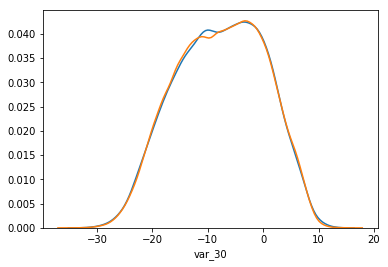

In [29]:
sns.distplot(data.var_30[data.target==1],hist=False) #low informative value for the classifier
sns.distplot(data.var_30[data.target==0],hist=False)

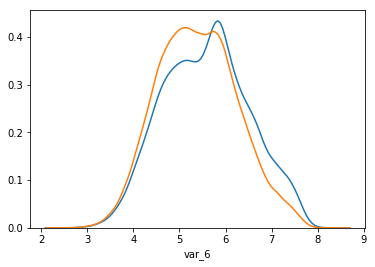

In [107]:
sns.distplot(data.var_6[data.target==1],hist=False) #higher informative value for the classifier
sns.distplot(data.var_6[data.target==0],hist=False)

In [108]:
data[['var_30','var_6','target']].corr()

,var_30,var_6,target
var_30,1.000000,-0.000698,0.000638
var_6,-0.000698,1.000000,0.066731
target,0.000638,0.066731,1.000000


__Using inferential statistics for distribution testing:__

In [6]:
import scipy.stats as stats

In [7]:
var=[]
pvalue=[]
for i in range(200): # Kolmogorov-Smirnov two-sample nonparametric test
    
    _,p_value_ks=stats.ks_2samp(data['var_'+str(i)][data.target==1], data['var_'+str(i)][data.target==0])
    
    var.append('var_'+str(i))
    pvalue.append(p_value_ks)

In [8]:
df_dist=pd.DataFrame()
df_dist['variable']=var
df_dist['pvalue']=pvalue

In [9]:
df_dist.sort_values('pvalue')[:20]

,variable,pvalue
81,var_81,5.989112e-230
139,var_139,2.961247e-217
6,var_6,7.587969e-157
110,var_110,4.774540e-142
12,var_12,2.645617e-133
76,var_76,9.208054e-124
146,var_146,1.448120e-119
80,var_80,1.054512e-116
26,var_26,5.354187e-116
2,var_2,4.638183e-114


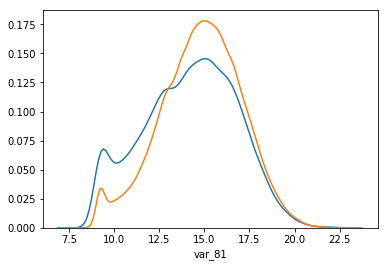

In [115]:
sns.distplot(data.var_81[data.target==1],hist=False)
sns.distplot(data.var_81[data.target==0],hist=False)

In [11]:
df_dist.pvalue[df_dist.variable=='var_30']

30    0.6007
Name: pvalue, dtype: float64

In [61]:
data_ml=data.drop('target',1)

In [63]:
data_1=data_ml.describe().T.index[data_ml.describe().T['std']<0.2]

In [65]:
data_1

Index(['var_12', 'var_68', 'var_91', 'var_103', 'var_108', 'var_148'], dtype='object')

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report
import time
np.warnings.filterwarnings('ignore')

In [67]:
X=data[data_1]
y=data.target

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=123)

In [74]:
pipe=Pipeline([("model", LogisticRegression())])
param_grid={"model__penalty":["l1","l2"]}
gs=GridSearchCV(pipe, param_grid, scoring='accuracy',cv=5, n_jobs=2)
gs.fit(X_train, y_train)
y_pred=gs.best_estimator_.predict(X_test)


print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best accuracy on train set: 0.8999285714285714
Accuracy on test set: 0.8985333333333333


__Confusion matrix:__

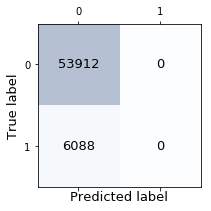

In [75]:
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax=plt.subplots(figsize=(3,3))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center',fontsize=13)
plt.xlabel('Predicted label',fontsize=13)
plt.ylabel('True label',fontsize=13)
plt.show()

In [78]:
data_2=data_ml.describe().T.index[data_ml.describe().T['std']>0.35]

In [79]:
data_2

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=189)

In [80]:
X=data[data_2]
y=data.target

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=123)

In [83]:
pipe=Pipeline([("model", LogisticRegression())])
param_grid={"model__penalty":["l1","l2"]}
gs=GridSearchCV(pipe, param_grid, scoring='accuracy',cv=5, n_jobs=2)
gs.fit(X_train, y_train)
y_pred=gs.best_estimator_.predict(X_test)


print(f"GS best accuracy on train set: {gs.score(X_train,y_train)}")
print(f"Accuracy on test set: {gs.score(X_test,y_test)}")

GS best accuracy on train set: 0.9132071428571429
Accuracy on test set: 0.9127666666666666


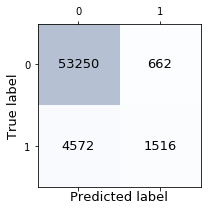

In [84]:
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax=plt.subplots(figsize=(3,3))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center',fontsize=13)
plt.xlabel('Predicted label',fontsize=13)
plt.ylabel('True label',fontsize=13)
plt.show()